In [11]:
import pandas as pd
import numpy as np
import datetime as dt

from matplotlib import pyplot as plt
import seaborn as sns

import datetime
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


    numpy (>=1.19.*) ; python_version >= "3.7"
           ~~~~~~~^


In [14]:
# Load the data from an Excel file
data = pd.read_csv('RFM tesis.csv')
data.head()

,Retail ID,Max of Tanggal,Count of Billing,Sum of Actual Rp
0,2100023,7/31/2023,30,2.726486e+08
1,2100060,11/5/2022,5,2.902441e+07
2,2112600,8/23/2023,4,9.941438e+06
3,2112602,12/27/2023,110,8.999598e+08
4,2112603,11/24/2023,174,1.593736e+09


In [15]:
# Check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retail ID         3170 non-null   int64  
 1   Max of Tanggal    3170 non-null   object 
 2   Count of Billing  3170 non-null   int64  
 3   Sum of Actual Rp  3170 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.2+ KB


In [16]:
data['Sum of Actual Rp'] = pd.to_numeric(data['Sum of Actual Rp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retail ID         3170 non-null   int64  
 1   Max of Tanggal    3170 non-null   object 
 2   Count of Billing  3170 non-null   int64  
 3   Sum of Actual Rp  3170 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 99.2+ KB


In [17]:
data['Max of Tanggal'] = pd.to_datetime(data['Max of Tanggal'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retail ID         3170 non-null   int64         
 1   Max of Tanggal    3170 non-null   datetime64[ns]
 2   Count of Billing  3170 non-null   int64         
 3   Sum of Actual Rp  3170 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 99.2 KB


In [18]:
# Calculate the reference date
pin_date = max(data['Max of Tanggal']) + dt.timedelta(1)
pin_date

Timestamp('2024-01-01 00:00:00')

In [19]:
# Perform RFM analysis
rfm = data.groupby('Retail ID').agg({
    'Max of Tanggal': lambda x: (pin_date - x.max()).days,
    'Count of Billing': 'sum',
    'Sum of Actual Rp': 'sum'
})
rfm

,Max of Tanggal,Count of Billing,Sum of Actual Rp
Retail ID,,,
2100000,612,7,1.734234e+08
2100023,154,90,1.242165e+10
2100032,270,1,7.586540e+05
2100060,1,6,3.947486e+07
2100338,684,35,1.069030e+10
...,...,...,...
2131041,696,1,3.448648e+06
2131045,665,1,2.522522e+06
2300000,678,75,5.202227e+09


In [20]:
data["Sum of Actual Rp"] = data["Sum of Actual Rp"].astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retail ID         3170 non-null   int64         
 1   Max of Tanggal    3170 non-null   datetime64[ns]
 2   Count of Billing  3170 non-null   int64         
 3   Sum of Actual Rp  3170 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 99.2 KB


In [21]:
# Rename the columns for RFM analysis
rfm.rename(columns={
    'Max of Tanggal': 'Recency',
    'Count of Billing': 'Frequency',
    'Sum of Actual Rp': 'Monetary'
}, inplace=True)
rfm

,Recency,Frequency,Monetary
Retail ID,,,
2100000,612,7,1.734234e+08
2100023,154,90,1.242165e+10
2100032,270,1,7.586540e+05
2100060,1,6,3.947486e+07
2100338,684,35,1.069030e+10
...,...,...,...
2131041,696,1,3.448648e+06
2131045,665,1,2.522522e+06
2300000,678,75,5.202227e+09


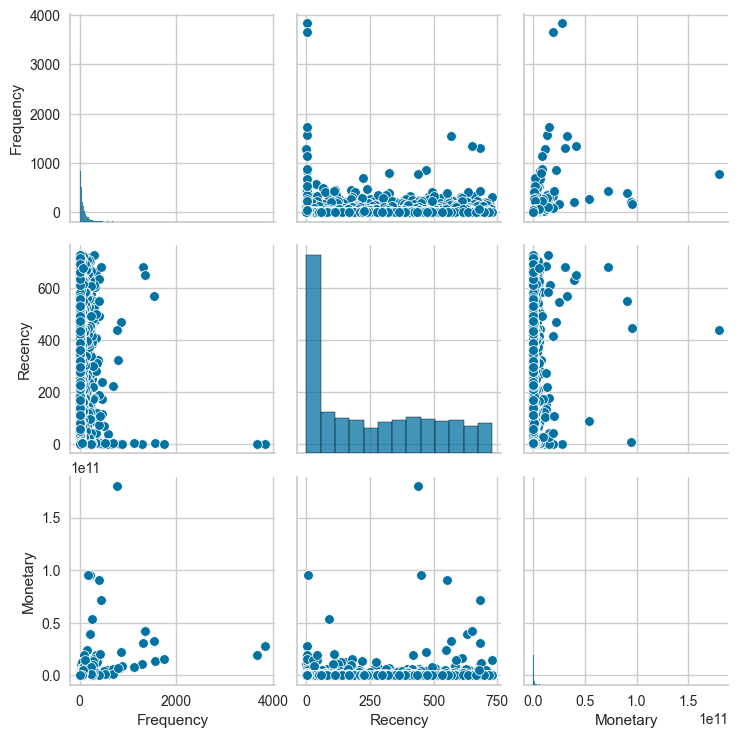

In [22]:
sns.pairplot(rfm[['Frequency','Recency','Monetary']])

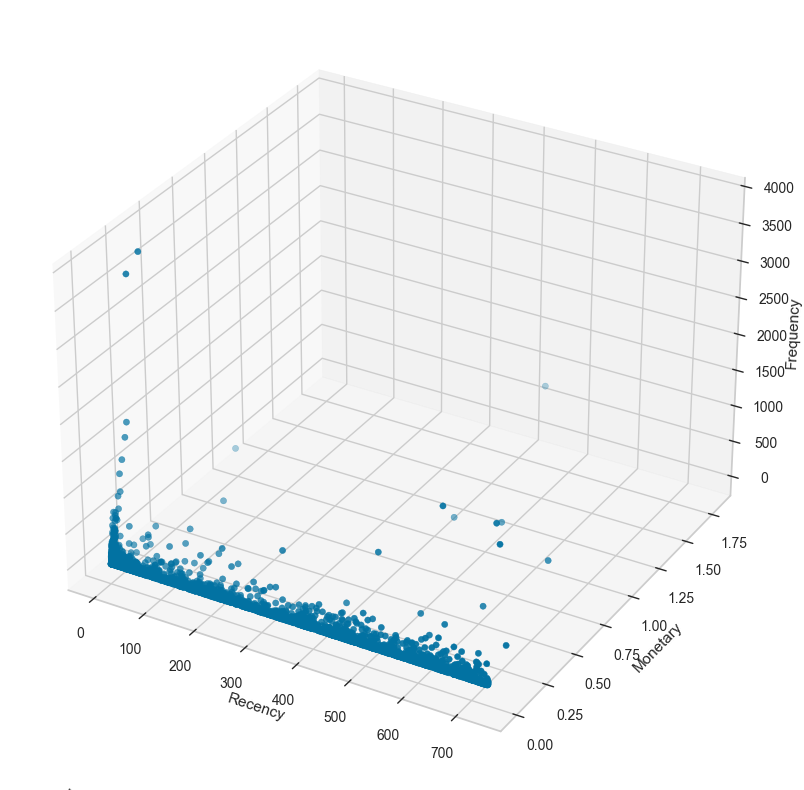

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'], rfm['Monetary'], rfm['Frequency'])
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')

plt.show()

In [24]:
from sklearn.neighbors import LocalOutlierFactor

In [25]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers = lof.fit_predict(rfm)
outliers_indices = rfm[outliers == -1].index
data_clean = rfm.drop(outliers_indices)

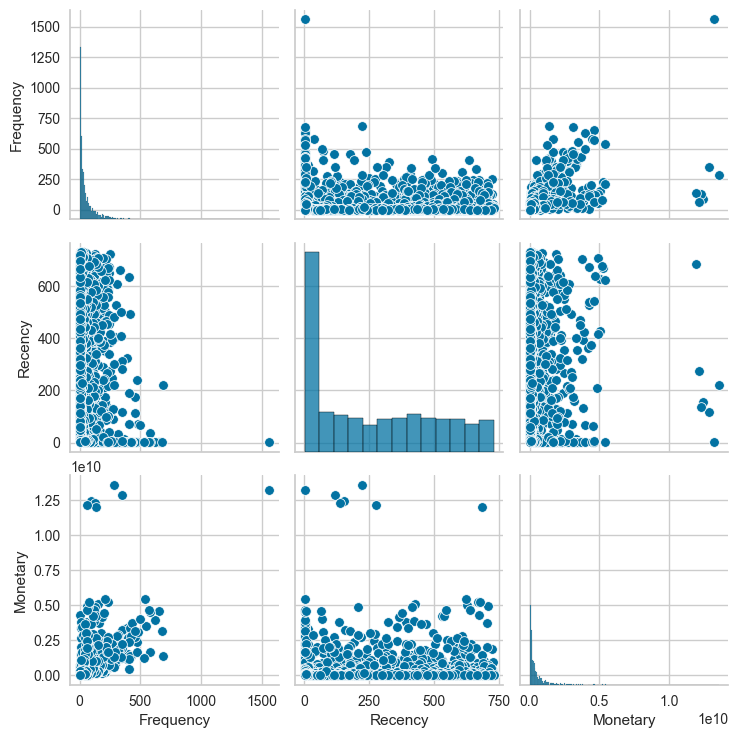

In [26]:
sns.pairplot(data_clean[['Frequency','Recency','Monetary']])

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean[['Recency', 'Frequency', 'Monetary']])

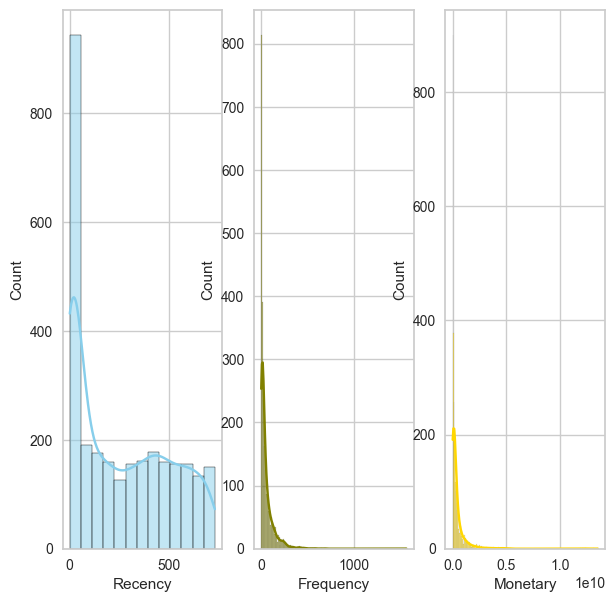

In [28]:
#Visualising the distribution of Recency, Frequency and Monetary variables :-

fig, axs = plt.subplots(1,3 ,figsize=(7, 7))

sns.histplot(data=data_clean, x="Recency", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=data_clean, x="Frequency", kde=True, color="olive", ax=axs[1])
sns.histplot(data=data_clean, x="Monetary", kde=True, color="gold", ax=axs[2])

plt.show()

One of the issues in clustering is that it will return clusters even if the data does not have any clusters . Therefore one must be confident that the dataset exhibits a tendency to cluster into natural groups. Hopkins Test is used to assess the clustering tendency.
Hopkins Test to check clustering tendency :

In [29]:
from cmath import isnan
from random import sample, uniform


def hopkins(X):
    d = X.shape[1]
    
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(data_clean)

0.9988758990694988

Null Hypothesis : Dataset is uniformly distibuted ( no meaningful clusters)
Alternative Hypothesis : Dataset is randomly distributed ( consists of meaningful clusters)
We reject the null hypothesis if the value of H > 0.5

DBSCAN Clustering
Setting MinPts as 2 * dimensions (6) to find the value of Eps. Generating an elbow plot for finding the value of Eps- :-

<Figure size 1200x600 with 0 Axes>

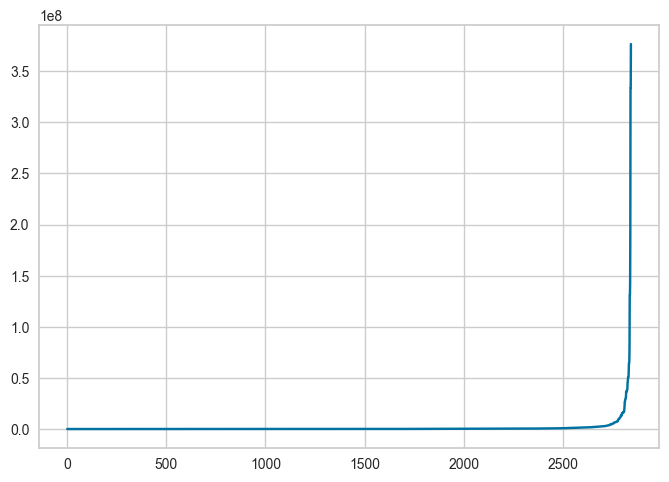

<Figure size 1200x600 with 0 Axes>

In [31]:
neighbours = NearestNeighbors(n_neighbors = 6)
knn_data = neighbours.fit(data_clean)

distances, indices = knn_data.kneighbors(data_clean)

sorting_distance = np.sort(distances, axis = 0)

sorted_distance = sorting_distance[:,1]
plt.plot(sorted_distance)

plt.figure(figsize = (12,6))

In [32]:
min_samples = range(6,19)
eps = np.arange(0.10,1.0, 0.1)

In [33]:
#iterating on different combinations of eps and minPts :-

output = []

for x in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=x, eps=ep).fit(data_clean).labels_
        
        # Mengecek apakah ada lebih dari satu cluster
        if len(set(labels)) > 1:  # set(labels) akan memberikan jumlah unik label, termasuk noise (-1)
            score = silhouette_score(data_clean, labels)
            output.append((x, ep, score))
        else:
            output.append((x, ep, None))  # None jika hanya ada 1 cluster atau noise

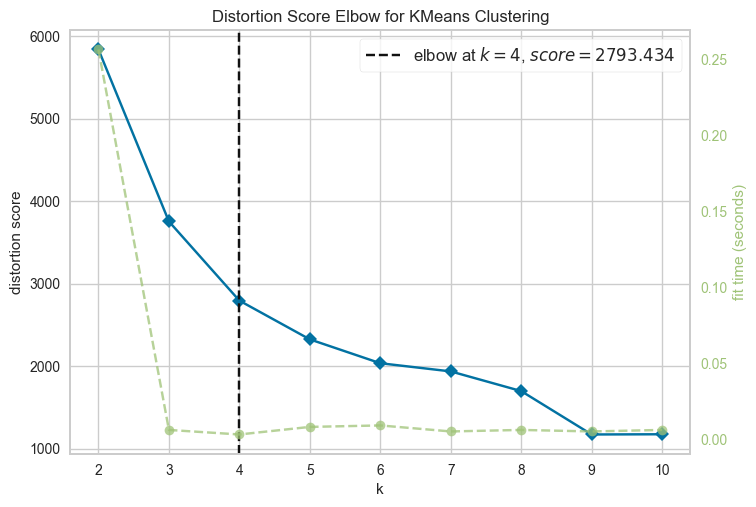

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(X_scaled)
Elbow_M.show()

In [35]:
dbscan = DBSCAN(eps=0.399, min_samples=15)
data_clean['Cluster'] = dbscan.fit_predict(X_scaled)

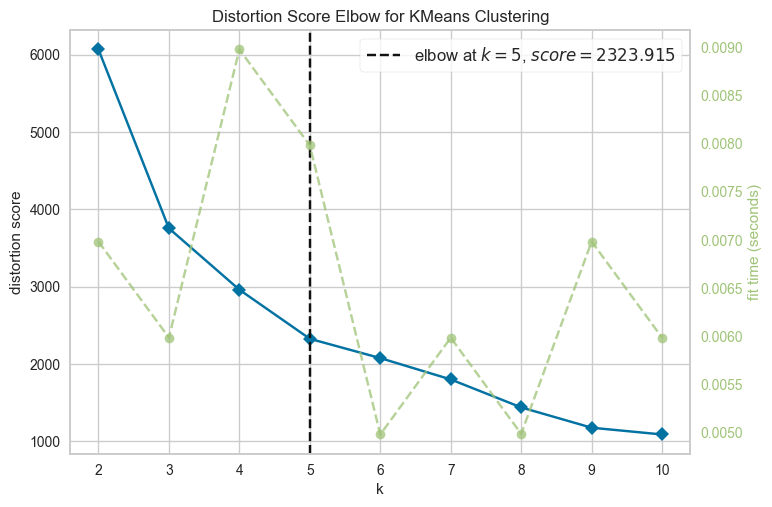

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
Elbow_M = KElbowVisualizer(KMeans(), k=10) 
Elbow_M.fit(X_scaled)
Elbow_M.show()

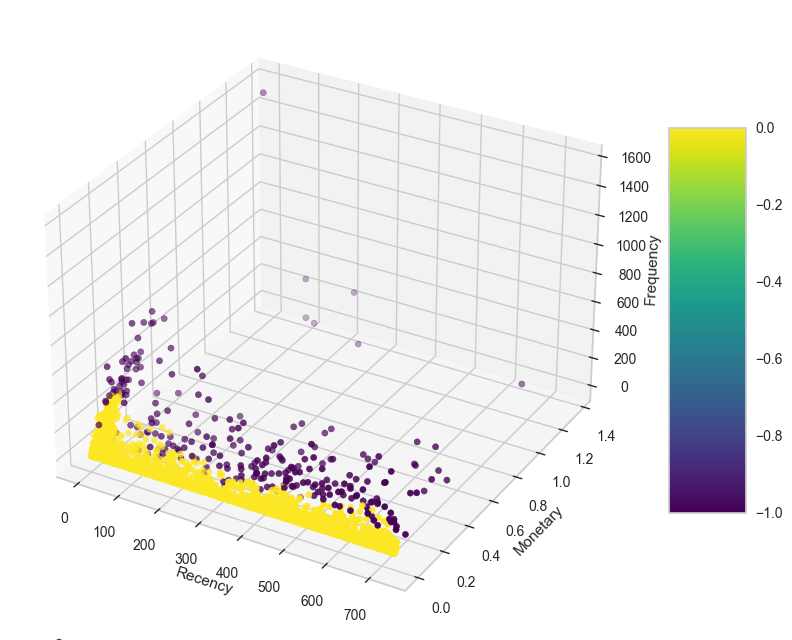

In [37]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.scatter(data_clean['Recency'], data_clean['Monetary'], data_clean['Frequency'], c=data_clean['Cluster'],cmap='viridis')
ax.set_xlabel('Recency')
ax.set_ylabel('Monetary')
ax.set_zlabel('Frequency')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

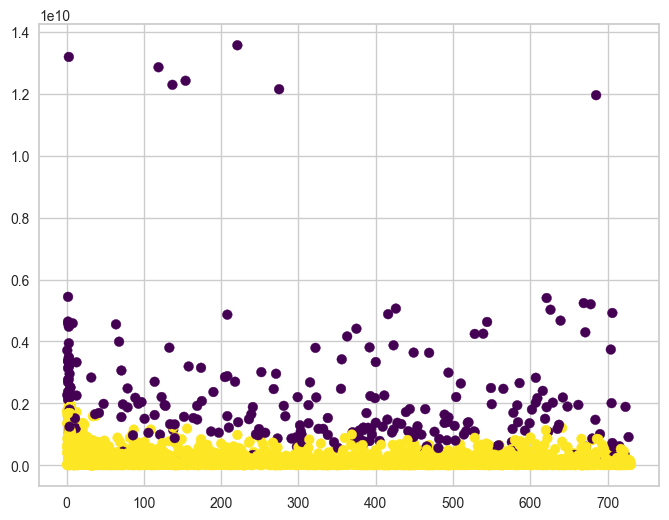

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.scatter(data_clean['Recency'], data_clean['Monetary'],c=data_clean['Cluster'],cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [39]:
inertias = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clean)
    inertias.append(kmeans.inertia_)

In [40]:
results = []

for i in range(2, 10):
    k = i
    kmeans = KMeans(n_clusters=k, random_state=42)
    data_clean['Cluster'] = kmeans.fit_predict(data_clean)  
    silhouette_avg = silhouette_score(data_clean, data_clean['Cluster'])  
    results.append((silhouette_avg)) 

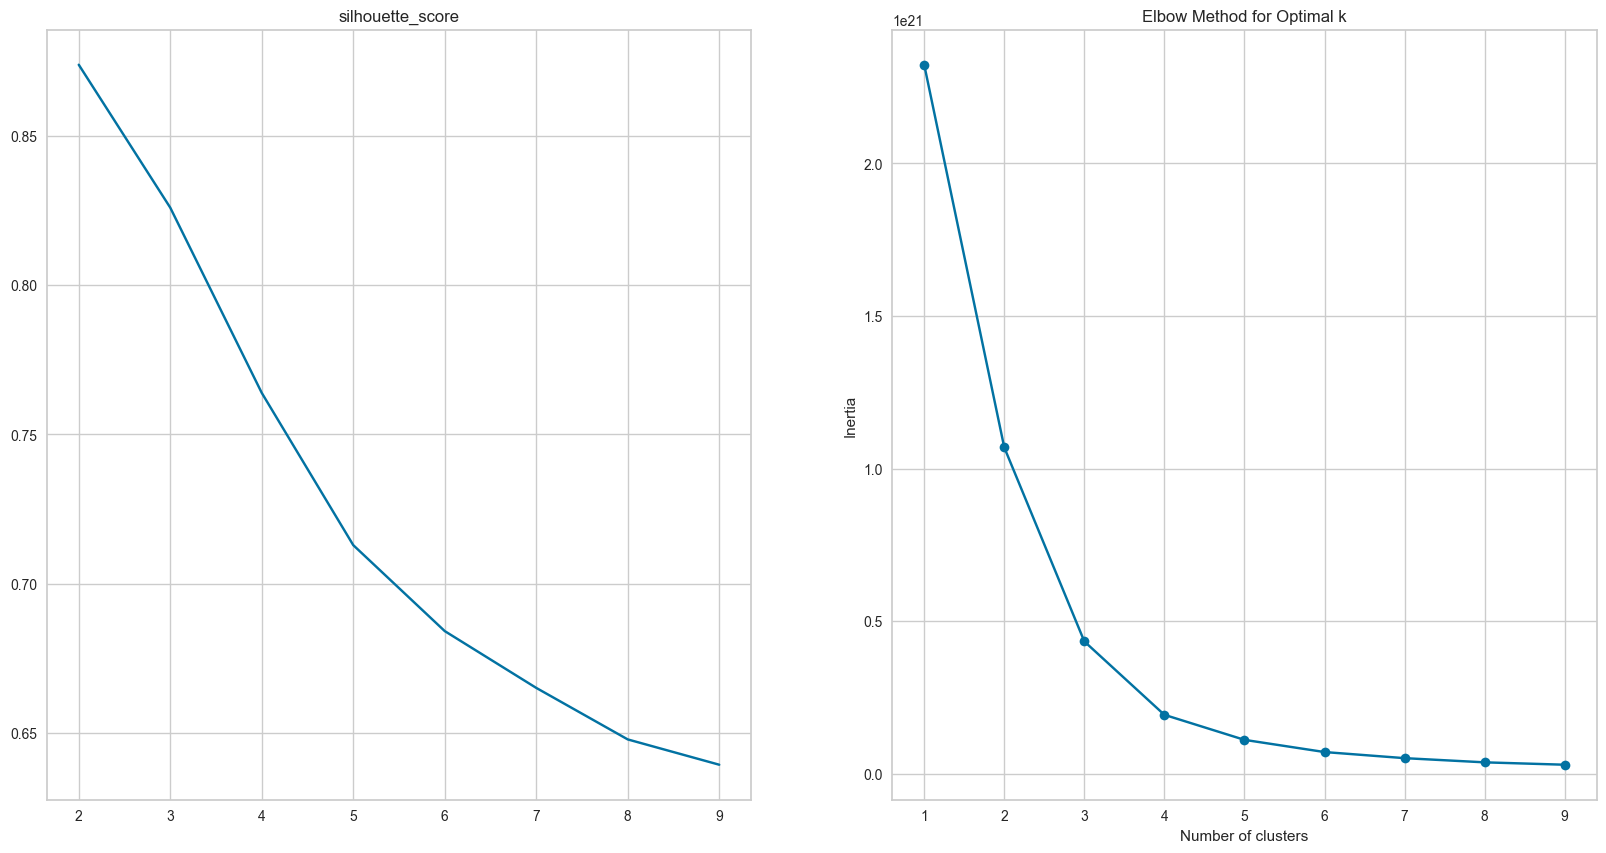

In [41]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
x = [2,3,4,5,6,7,8,9]
y = results
plt.plot(x,y)
plt.title('silhouette_score')

ax = fig.add_subplot(1,2,2)
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()

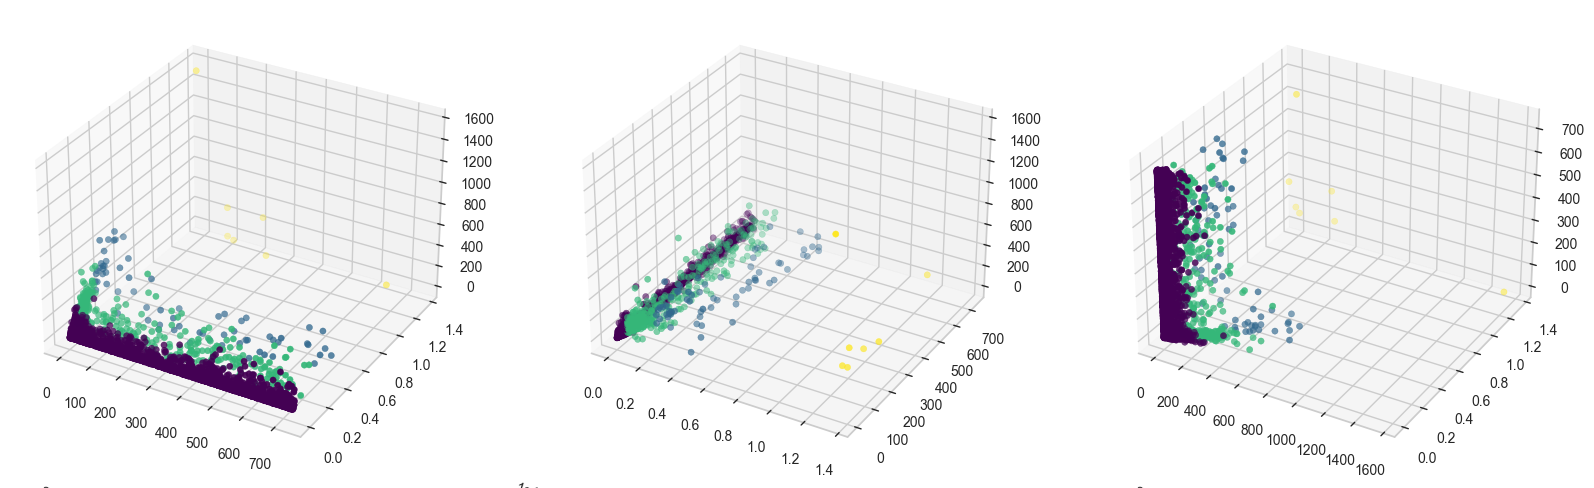

In [42]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data_clean['Cluster'] = kmeans.fit_predict(data_clean)



fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(data_clean['Recency'], data_clean['Monetary'], data_clean['Frequency'], c=data_clean['Cluster'], cmap='viridis')


ax = fig.add_subplot(132, projection='3d')
ax.scatter(data_clean['Monetary'],data_clean['Recency'], data_clean['Frequency'], c=data_clean['Cluster'], cmap='viridis')


ax = fig.add_subplot(133, projection='3d')
ax.scatter( data_clean['Frequency'],data_clean['Monetary'],data_clean['Recency'], c=data_clean['Cluster'], cmap='viridis')


plt.show()

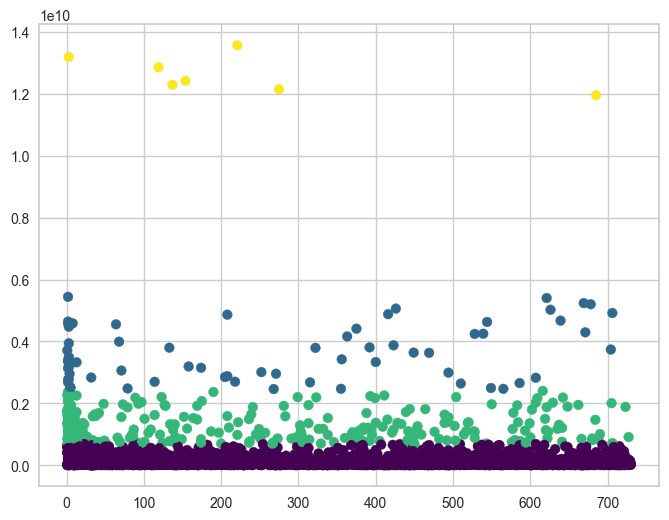

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.scatter(data_clean['Recency'], data_clean['Monetary'],c=data_clean['Cluster'],cmap='viridis')

<Axes: xlabel='Cluster', ylabel='Monetary'>

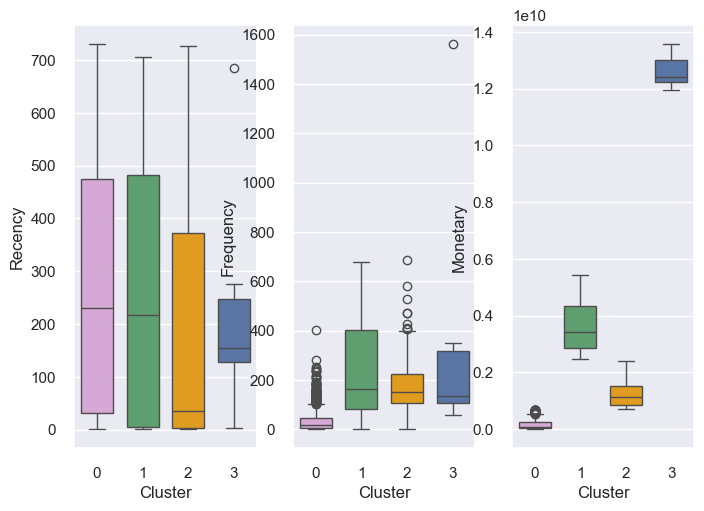

In [44]:
#Checking the distribution of Recency, Frequency and Monetary values in different clusters:-

sns.set()


#define plotting region (1 row, 3 columns)

fig, axes = plt.subplots(1, 3)
palette = ['plum', 'g', 'orange', 'b', 'r']

#create boxplot in each subplot
sns.boxplot(data=data_clean, x='Cluster', y='Recency', palette=palette,
            width=0.7, dodge=False, ax=axes[0])
sns.boxplot(data=data_clean, x='Cluster', y='Frequency',palette=palette,
            width=0.7, dodge=False, ax=axes[1])
sns.boxplot(data=data_clean, x='Cluster', y='Monetary',palette=palette,
            width=0.7, dodge=False, ax=axes[2])





In [45]:
data_clean.head()

,Recency,Frequency,Monetary,Cluster
Retail ID,,,,
2100000,612,7,1.734234e+08,0
2100023,154,90,1.242165e+10,3
2100032,270,1,7.586540e+05,0
2100060,1,6,3.947486e+07,0
2100693,666,1,1.252252e+06,0


In [46]:
data_clean.describe()

,Recency,Frequency,Monetary,Cluster
count,2845.000000,2845.000000,2.845000e+03,2845.000000
mean,261.118453,55.797540,4.077536e+08,0.289631
std,236.164576,83.512132,9.039116e+08,0.692370
min,1.000000,1.000000,9.909900e+04,0.000000
25%,21.000000,8.000000,3.637387e+07,0.000000
50%,210.000000,26.000000,1.331712e+08,0.000000
75%,464.000000,69.000000,4.086482e+08,0.000000
max,730.000000,1561.000000,1.356789e+10,3.000000


In [47]:
cluster_stats = data_clean.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].describe()

cluster_stats

Recency                                                            \
          count        mean         std  min    25%    50%     75%    max   
Cluster                                                                     
0        2403.0  273.069496  235.516377  1.0   32.0  230.0  474.00  730.0   
1          67.0  267.074627  244.612886  1.0    4.5  218.0  481.50  706.0   
2         368.0  182.630435  224.697470  1.0    4.0   35.5  371.75  727.0   
3           7.0  227.714286  218.849046  3.0  128.0  154.0  248.00  685.0   

        Frequency              ...                Monetary                \
            count        mean  ...    75%     max    count          mean   
Cluster                        ...                                         
0          2403.0   32.730337  ...   45.0   403.0   2403.0  1.579956e+08   
1            67.0  239.462687  ...  404.5   680.0     67.0  3.620125e+09   
2           368.0  166.970109  ...  223.0   687.0    368.0  1.221231e+09   
3             7.0  372.000000  ...  316.5  1561.0      7.0  1.263347e+10   

                                                                               \
                  std           min           25%           50%           75%   
Cluster                                                                         
0        1.679688e+08  9.909900e+04  2.821228e+07  9.151048e+07  2.367231e+08   
1        8.808073e+08  2.462485e+09  2.842301e+09  3.423122e+09  4.353432e+09   
2        4.415501e+08  6.926094e+08  8.527441e+08  1.124330e+09  1.511156e+09   
3        5.903874e+08  1.195582e+10  1.221976e+10  1.242165e+10  1.302470e+10   

                       
                  max  
Cluster                
0        6.915303e+08  
1        5.441403e+09  
2        2.403686e+09  
3        1.356789e+10  

[4 rows x 24 columns]

In [50]:
# Menampilkan hasil ke terminal
print(cluster_stats)

# Jika Anda ingin menyimpannya ke file CSV
cluster_stats.to_csv(r"C:\Users\USER\Desktop\cluster_statistics_summary.csv", index=True)



        Recency                                                            \
          count        mean         std  min    25%    50%     75%    max   
Cluster                                                                     
0        2403.0  273.069496  235.516377  1.0   32.0  230.0  474.00  730.0   
1          67.0  267.074627  244.612886  1.0    4.5  218.0  481.50  706.0   
2         368.0  182.630435  224.697470  1.0    4.0   35.5  371.75  727.0   
3           7.0  227.714286  218.849046  3.0  128.0  154.0  248.00  685.0   

        Frequency              ...                Monetary                \
            count        mean  ...    75%     max    count          mean   
Cluster                        ...                                         
0          2403.0   32.730337  ...   45.0   403.0   2403.0  1.579956e+08   
1            67.0  239.462687  ...  404.5   680.0     67.0  3.620125e+09   
2           368.0  166.970109  ...  223.0   687.0    368.0  1.221231e+09   
3   

In [44]:
data_clean['Cluster'].value_counts()

Cluster
0    2403
2     368
1      67
3       7
Name: count, dtype: int64

In [86]:
X = X_scaled
dbscan = DBSCAN(eps=0.399, min_samples=20)
dbscan.fit(X)
dbscan.labels_

array([ 0, -1,  0, ..., -1,  0,  0], dtype=int64)

In [61]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score


def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    return db_index, s_score, ch_index

In [87]:
db_DBSCAN, ss_DBSCAN, ch_DBSCAN = evaluate_clustering(X,dbscan.labels_)

print(db_DBSCAN,ss_DBSCAN,ch_DBSCAN)

1.251 0.528 898.304
